    ## Kaggle Dataset - Stroke Predictions

In [13]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\rhasan\\Downloads"
CHAPTER_ID = "stroke"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('C:\\Users\\rhasan\\Downloads\\Stroke data\\train_2v.csv')

In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [31]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,43400.0,36326.142350,21072.134879,1.00,18038.50,36351.50,54514.25,72943.00
age,43400.0,42.217894,22.519649,0.08,24.00,44.00,60.00,82.00
hypertension,43400.0,0.093571,0.291235,0.00,0.00,0.00,0.00,1.00
heart_disease,43400.0,0.047512,0.212733,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,43400.0,104.482750,43.111751,55.00,77.54,91.58,112.07,291.05
bmi,41938.0,28.605038,7.770020,10.10,23.20,27.70,32.90,97.60
stroke,43400.0,0.018041,0.133103,0.00,0.00,0.00,0.00,1.00


In [34]:
df = df.drop('id', axis=1)

In [35]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

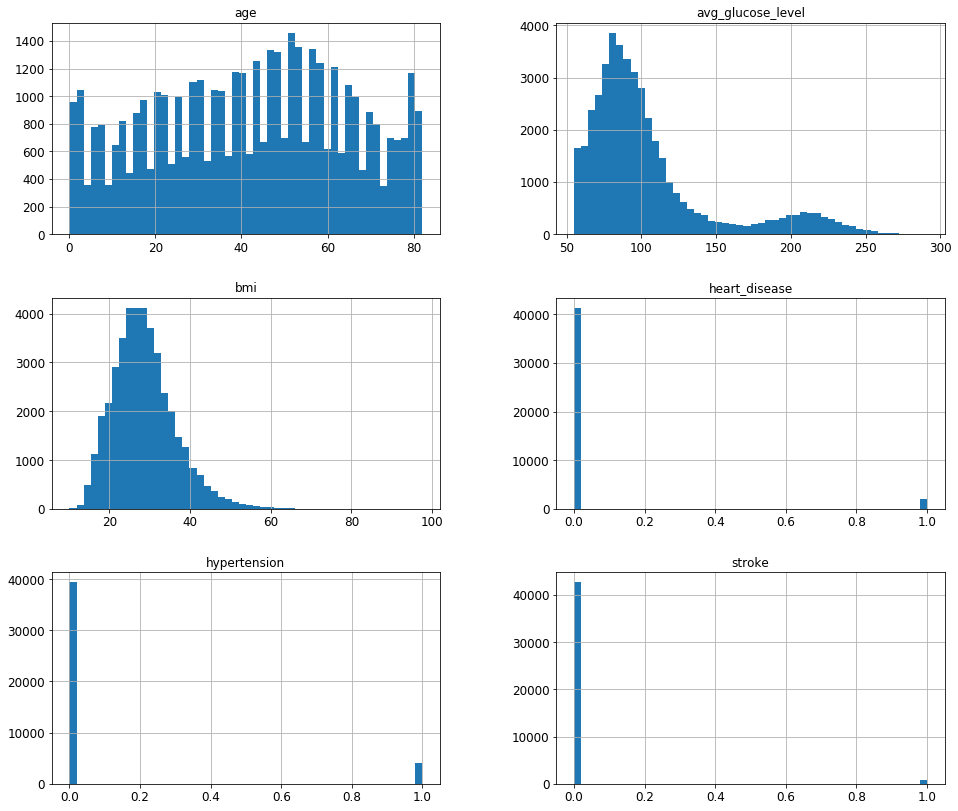

In [39]:
df.hist(bins=50, figsize=(16,14))
plt.show()

In [40]:
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["stroke"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [48]:
train_set.shape

(34720, 11)

In [49]:
test_set.shape

(8680, 11)

In [50]:
train_set['stroke'].value_counts()

0    34094
1      626
Name: stroke, dtype: int64

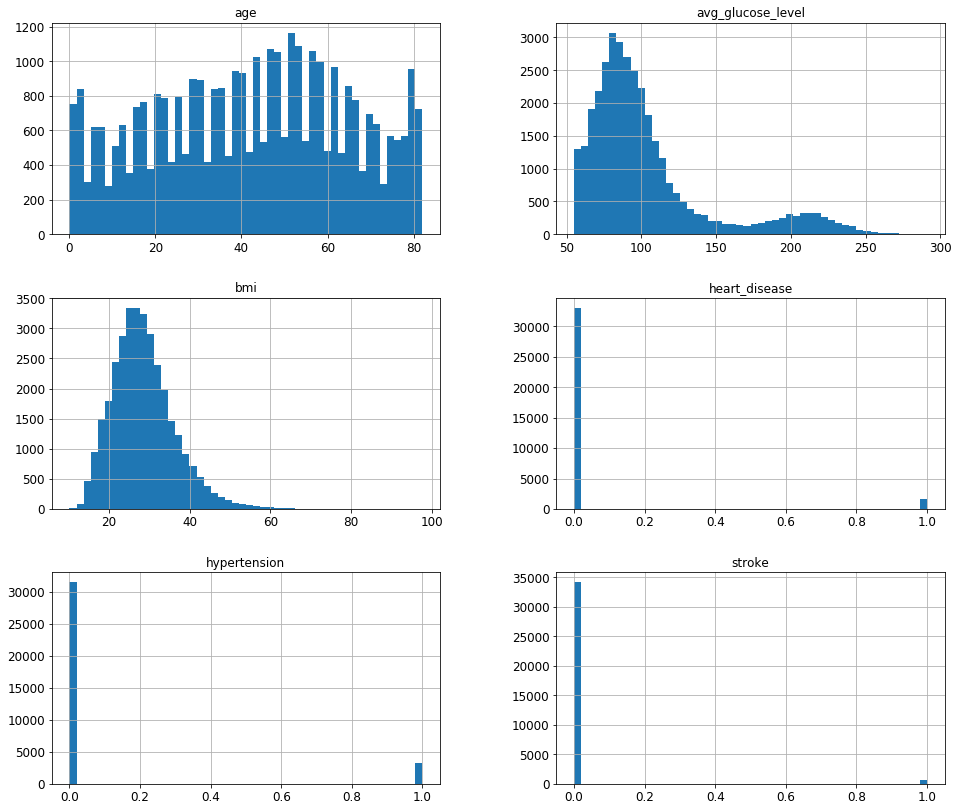

In [51]:
train_set.hist(bins=50, figsize=(16,14))
plt.show()

In [52]:
corr_matrix = train_set.corr()

In [57]:
corr_matrix['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.156389
heart_disease        0.124737
avg_glucose_level    0.085734
hypertension         0.071873
bmi                  0.017744
Name: stroke, dtype: float64

Saving figure Stroke_Scatter_Matrix


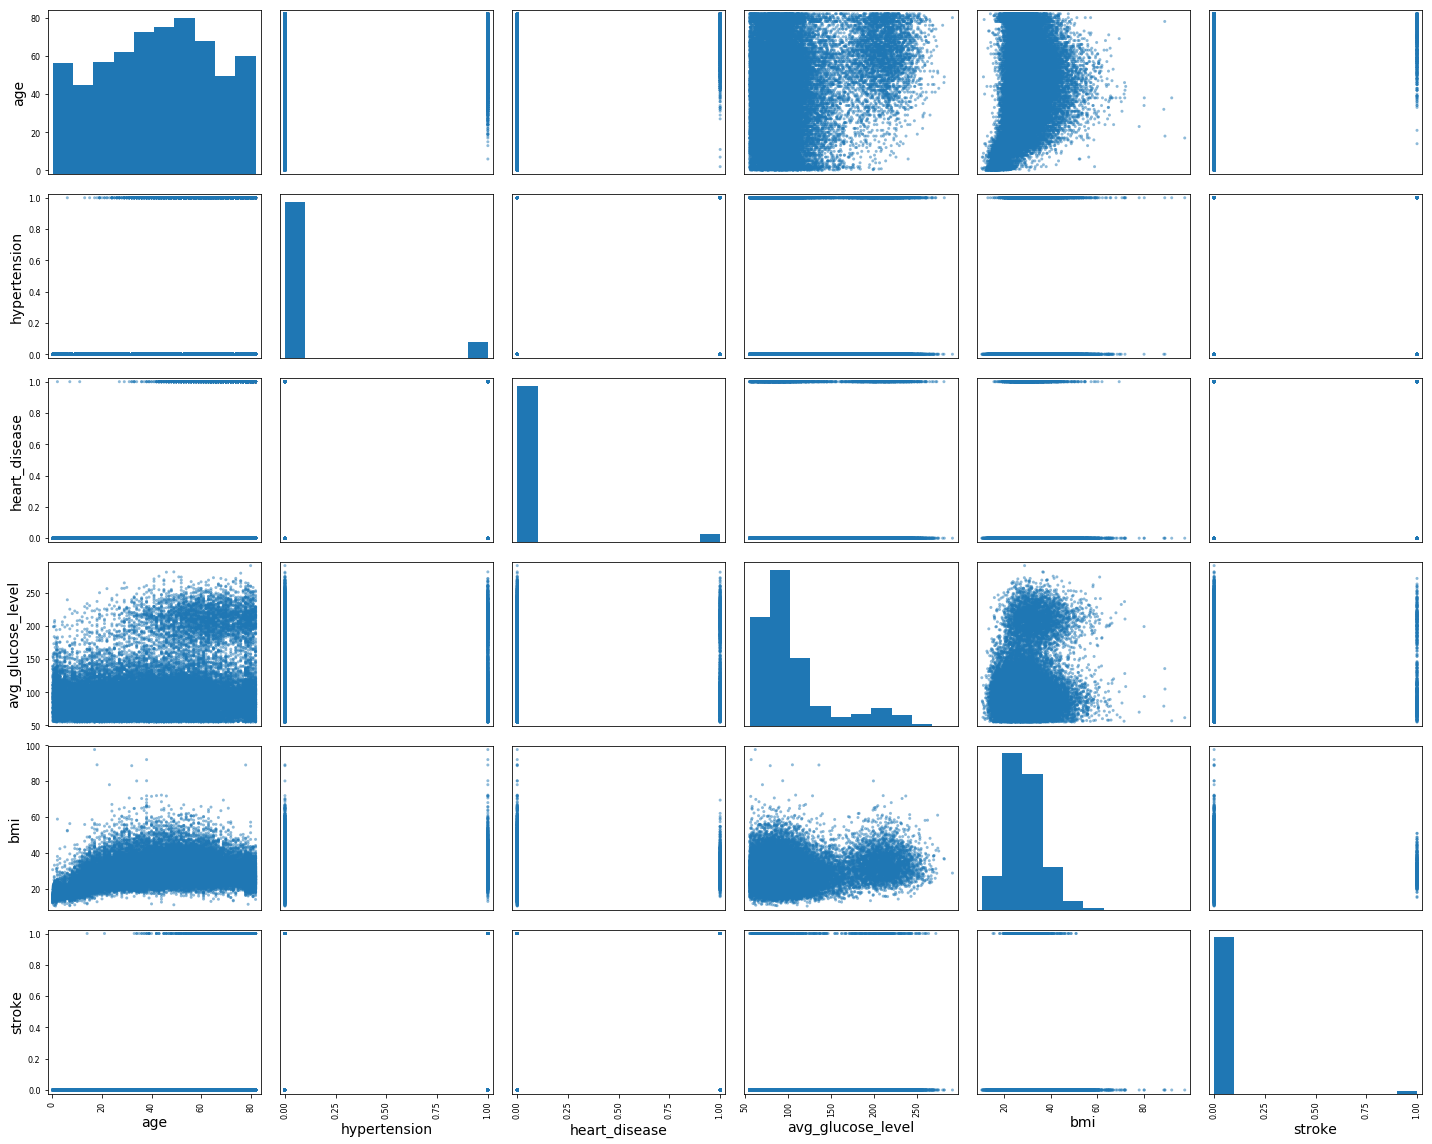

In [61]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_set, figsize=(20,16))
save_fig("Stroke_Scatter_Matrix")

In [62]:
df = train_set.copy()

In [63]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

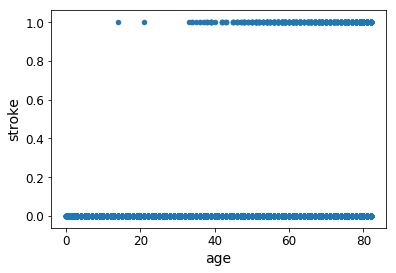

In [64]:
df.plot(kind='scatter', x='age', y='stroke')

In [66]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,34720.000000,34720.000000,34720.000000,34720.000000,33572.000000,34720.000000
mean,42.259844,0.093318,0.048416,104.295582,28.617059,0.018030
std,22.509079,0.290882,0.214647,42.912906,7.761734,0.133062
min,0.080000,0.000000,0.000000,55.000000,10.300000,0.000000
25%,24.000000,0.000000,0.000000,77.490000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.500000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,111.800000,32.800000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34720 entries, 1364 to 21868
Data columns (total 11 columns):
gender               34720 non-null object
age                  34720 non-null float64
hypertension         34720 non-null int64
heart_disease        34720 non-null int64
ever_married         34720 non-null object
work_type            34720 non-null object
Residence_type       34720 non-null object
avg_glucose_level    34720 non-null float64
bmi                  33572 non-null float64
smoking_status       24076 non-null object
stroke               34720 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.2+ MB


In [75]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X], #can use mean()
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

#data = [
    #['a', 1, 2],
    #['b', 1, 1],
    #['b', 2, 2],
    #[np.nan, np.nan, np.nan]]

X = pd.DataFrame(df)
df_t = DataFrameImputer().fit_transform(X)

In [77]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34720 entries, 1364 to 21868
Data columns (total 11 columns):
gender               34720 non-null object
age                  34720 non-null float64
hypertension         34720 non-null int64
heart_disease        34720 non-null int64
ever_married         34720 non-null object
work_type            34720 non-null object
Residence_type       34720 non-null object
avg_glucose_level    34720 non-null float64
bmi                  34720 non-null float64
smoking_status       34720 non-null object
stroke               34720 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.2+ MB


In [78]:
df_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,34720.0,42.259844,22.509079,0.08,24.00,44.0,60.0,82.00
hypertension,34720.0,0.093318,0.290882,0.00,0.00,0.0,0.0,1.00
heart_disease,34720.0,0.048416,0.214647,0.00,0.00,0.0,0.0,1.00
avg_glucose_level,34720.0,104.295582,42.912906,55.00,77.49,91.5,111.8,291.05
bmi,34720.0,28.586737,7.634094,10.30,23.40,27.7,32.6,97.60
stroke,34720.0,0.018030,0.133062,0.00,0.00,0.0,0.0,1.00


In [79]:
df = df_t.copy()

In [80]:
#Categorical & Numeric Columns 
X_train = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
              'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']]
X_train_num = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
X_train_cat = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
y_train = df[['stroke']]


#Create Pipeline
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

from sklearn.compose import ColumnTransformer
num_attribs = list(X_train_num)
cat_attribs = list(X_train_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [81]:
X_train_prepared

array([[-1.1222231 , -0.32081535, -0.22556432, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.54340637,  3.11705781, -0.22556432, ...,  1.        ,
         0.        ,  0.        ],
       [-0.67795152, -0.32081535, -0.22556432, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.38878604, -0.32081535, -0.22556432, ...,  0.        ,
         1.        ,  0.        ],
       [-0.98894162, -0.32081535, -0.22556432, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.01028048, -0.32081535, -0.22556432, ...,  0.        ,
         1.        ,  0.        ]])

In [83]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

#Evaluate Model
from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_train, df_predictions)
lin_mae

#Fine Tune Cross Validation
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [0.12547613 0.12488478 0.14307988 0.12312531 0.13121431 0.12569483
 0.1199176  0.12625427 0.14228477 0.1408906 ]
Mean: 0.13028224737113356
Standard deviation: 0.008181649755494763


In [84]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_prepared, y_train)

#Evaluate Model
df_predictions = tree_reg.predict(X_train_prepared)
tree_mse = mean_squared_error(y_train, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#Fine Tune Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.19050019 0.1979154  0.20435918 0.19275471 0.18898224 0.18513291
 0.1843534  0.19125465 0.19050019 0.20223407]
Mean: 0.19279869269673686
Standard deviation: 0.006375394987722927


In [90]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_prepared, y_train.values.ravel())

#Evaluate Model
df_predictions = forest_reg.predict(X_train_prepared)
forest_mse = mean_squared_error(y_train, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

#Fine Tune Cross Validation
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, X_train_prepared, y_train.values.ravel(), scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

C:\Users\rhasan\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores: [0.13994732 0.1389974  0.15384848 0.1370883  0.14392458 0.1365726
 0.13283075 0.13874852 0.15106191 0.15177521]
Mean: 0.14247950768666048
Standard deviation: 0.006934853532290664


In [88]:
#Support Vector Machine
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_prepared, y_train.values.ravel())

#Evaluate Model
df_predictions = svm_reg.predict(X_train_prepared)
svm_mse = mean_squared_error(y_train, df_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.1562860995110131

In [92]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [2, 5, 8], 'max_features': [1, 2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_prepared, y_train.values.ravel())

print(grid_search.best_params_)
print(grid_search.best_estimator_)

#show CV results
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

{'max_features': 4, 'n_estimators': 8}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=8, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
0.16379535112661545 {'max_features': 1, 'n_estimators': 2}
0.1465619826098971 {'max_features': 1, 'n_estimators': 5}
0.14249034852916578 {'max_features': 1, 'n_estimators': 8}
0.16032980122637938 {'max_features': 2, 'n_estimators': 2}
0.14634565484237735 {'max_features': 2, 'n_estimators': 5}
0.14215992193434082 {'max_features': 2, 'n_estimators': 8}
0.16216067016791944 {'max_features': 3, 'n_estimators': 2}
0.1471425215870184 {'max_features': 3, 'n_estimators': 5}
0.14231179209522604 {'max_features': 3, 'n_estimators': 8}
0.1625598082068247 {'max_features': 4, 'n_estimators':

In [94]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, 
                                cv=5, scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(X_train_prepared, y_train.values.ravel())

#Show Random Search CV results
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.134514817969406 {'max_features': 7, 'n_estimators': 180}
0.1378237704645651 {'max_features': 5, 'n_estimators': 15}
0.13581101007042545 {'max_features': 3, 'n_estimators': 72}
0.13672873686334983 {'max_features': 5, 'n_estimators': 21}
0.1347453427569843 {'max_features': 7, 'n_estimators': 122}
0.13577026091187966 {'max_features': 3, 'n_estimators': 75}
0.13567261866995828 {'max_features': 3, 'n_estimators': 88}
0.13476221805367608 {'max_features': 5, 'n_estimators': 100}
0.13532363873019654 {'max_features': 3, 'n_estimators': 150}
0.16073348579627456 {'max_features': 5, 'n_estimators': 2}


In [95]:
#Feature Importance
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

#Add name of the feature next to importance
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.339181848354494, 'avg_glucose_level'),
 (0.2639410847516839, 'bmi'),
 (0.20023347656336285, 'age'),
 (0.02312502066397523, 'heart_disease'),
 (0.02251034645180833, 'hypertension'),
 (0.016423069535674236, 'Male'),
 (0.012932190357514667, 'Female'),
 (2.2399765634736097e-08, 'Other')]

    ## Testing Model

In [102]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X], #can use mean()
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

#data = [
    #['a', 1, 2],
    #['b', 1, 1],
    #['b', 2, 2],
    #[np.nan, np.nan, np.nan]]

X = pd.DataFrame(test_set)
test_set_t = DataFrameImputer().fit_transform(X)

In [105]:
X_test = test_set_t[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
              'Residence_type', 'avg_glucose_level', 'bmi','smoking_status']]
#X_train_num = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
#X_train_cat = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
y_test = test_set_t[['stroke']]

In [106]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
14530,Female,41.0,0,0,Yes,Private,Rural,64.88,22.5,never smoked
38565,Female,20.0,0,0,No,Self-employed,Urban,61.48,30.8,never smoked
16050,Female,68.0,0,1,Yes,Private,Rural,217.68,28.3,smokes
42215,Female,16.0,0,0,No,Private,Urban,82.50,26.2,formerly smoked
3109,Male,52.0,1,0,Yes,Govt_job,Urban,214.43,39.9,smokes


In [107]:
#Final Model - Prepare test set
X_test_prepared = full_pipeline.transform(X_test)

#Prepare Final Model
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_prepared)

#Predit
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.1428751428752143